Import the required packages

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

Read the CSV file containing the location data into a pandas dataframe

In [10]:
df = pd.read_csv('GrowLocations.csv')
df.head()

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z


To clean the data, first, slice the dataframe to remove every column except the columns containing the latitude and longitude data.

In [11]:
truncated_df = df[['Latitude', 'Longitude']]
truncated_df.head()

,Latitude,Longitude
0,-7.923,54.98
1,-7.923,54.98
2,-7.923,54.98
3,-7.923,54.98
4,-7.923,54.98


Based on the provided values for the map's boundaries, it seems the Latitude and Longitude data are named the other way around. Correct this by renaming the columns. The code to rename the columns is taken from https://stackoverflow.com/a/25793732

In [12]:
swapped = truncated_df.rename(columns={'Latitude':'Longitude', 'Longitude':'Latitude'})
swapped.head()

,Longitude,Latitude
0,-7.923,54.98
1,-7.923,54.98
2,-7.923,54.98
3,-7.923,54.98
4,-7.923,54.98


To see the number of rows in the current dataframe, run

In [13]:
swapped.count()

Longitude    39294
Latitude     39294
dtype: int64

Select only the location values that fall within the bounding box range

In [14]:
filtered = swapped.query('Longitude > -10.592 and Longitude < 1.6848 and Latitude > 50.681 and Latitude < 57.985')

Run count() on the new dataframe to get a sense of how many rows have been removed. It can be seen that 32856 rows have been removed.

In [15]:
filtered.count()

Longitude    6438
Latitude     6438
dtype: int64

With the cleaned data, use matplotlib to plot a graph containing the UK Map. The axes of the map are shifted to adjust for the bounding box values. Python package Pillow is used to read the image and the Image object is then passed to matplotlib for plotting. matplotlib's scatter() function is used to plot the points on the map as a scatterplot. The code for this is inspired from matplotlib documentation at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html , https://matplotlib.org/stable/tutorials/images.html and https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

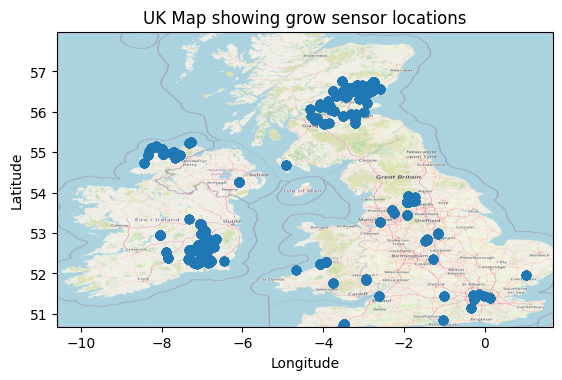

In [16]:
img = Image.open('map7.png')
shift_factor = ((-10.592, 1.6848, 50.681, 57.985))
plt.axis(shift_factor)
plt.imshow(img, extent=(shift_factor))
plt.scatter(filtered['Longitude'],filtered['Latitude'])

# Add labels to the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('UK Map showing grow sensor locations')

# Display the plot
plt.show()